In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("dataset.csv")
# display(df)

In [2]:
df.describe()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
count,3.960000e+03,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,...,3879.000000,0.0,3879.000000,3879.000000,0.0,0.0,853.000000,0.0,3879.000000,3960.000000
mean,1.449734e+09,1.003138,0.027485,0.026993,0.054821,0.990180,1.000575,1.012926,1.955774,6.682075,...,0.002062,NaN,0.073215,0.194122,NaN,NaN,0.648300,NaN,0.424852,1.933333
std,7.614104e+04,0.013580,0.071478,0.082519,0.128918,0.039063,0.010590,0.049396,0.715485,0.010834,...,0.045373,NaN,0.260522,0.395574,NaN,NaN,0.477781,NaN,0.494384,0.517538
min,1.449602e+09,0.985754,0.000882,-0.256536,0.001141,0.558528,0.929253,0.987569,0.027077,6.553157,...,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,-1.000000
25%,1.449661e+09,0.999587,0.001023,-0.000562,0.001362,0.996610,0.999100,1.000674,1.409567,6.684555,...,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,2.000000
50%,1.449740e+09,1.000886,0.001577,0.000330,0.002213,0.999168,1.000638,1.001804,2.272406,6.684610,...,0.000000,NaN,0.000000,0.000000,NaN,NaN,1.000000,NaN,0.000000,2.000000
75%,1.449800e+09,1.002138,0.010663,0.003166,0.027036,1.000502,1.001668,1.003163,2.563175,6.684611,...,0.000000,NaN,0.000000,0.000000,NaN,NaN,1.000000,NaN,1.000000,2.000000
max,1.449860e+09,1.496362,0.611785,0.753589,1.098388,1.221931,1.405116,1.675105,2.891861,6.684611,...,1.000000,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.000000,6.000000


In [3]:
df.isnull().sum()

timestamp                             0
raw_acc:magnitude_stats:mean          0
raw_acc:magnitude_stats:std           0
raw_acc:magnitude_stats:moment3       0
raw_acc:magnitude_stats:moment4       0
                                   ... 
label:PHONE_IN_BAG                 3960
label:PHONE_ON_TABLE               3107
label:WITH_CO-WORKERS              3960
label:WITH_FRIENDS                   81
label_source                          0
Length: 278, dtype: int64

<ipython-input-4-44c5f4016b2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-44c5f4016b2e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['Cluster'] = clusters


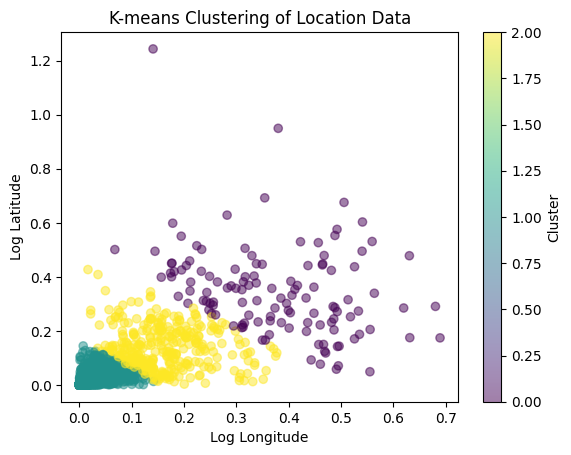

In [4]:
location_data = df[['location:log_latitude_range', 'location:log_longitude_range']]

location_data.dropna(inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_location_data = scaler.fit_transform(location_data)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_location_data)

location_data['Cluster'] = clusters

plt.scatter(location_data['location:log_longitude_range'],location_data['location:log_latitude_range'],c=location_data['Cluster'],cmap = 'viridis', alpha=0.5)
plt.title('K-means Clustering of Location Data')
plt.xlabel('Log Longitude')
plt.ylabel('Log Latitude')
plt.colorbar(label='Cluster')
plt.show()

<ipython-input-7-4755bb02f908>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cluster'] = location_data['Cluster']


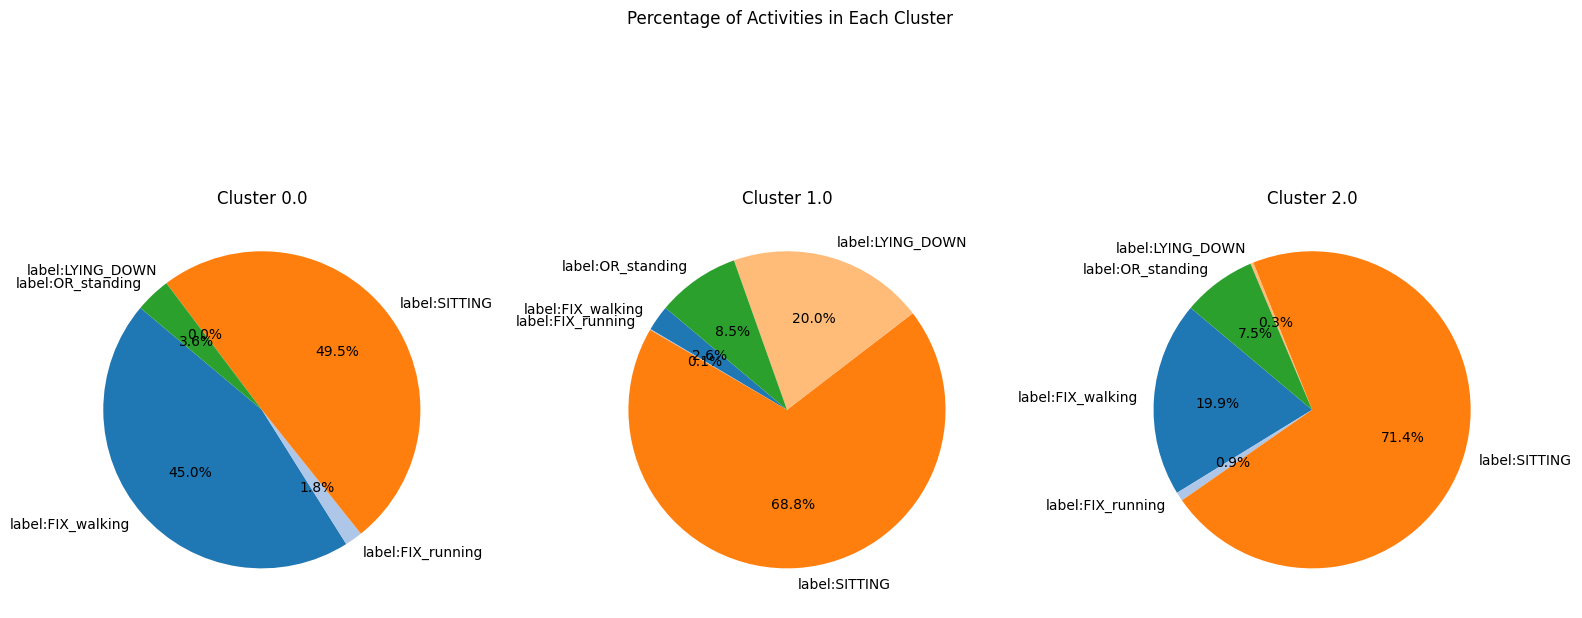

In [7]:
data_with_clusters = pd.concat([location_data, df.filter(like='label:')], axis=1)
activities_of_interest = ['label:FIX_walking', 'label:FIX_running', 'label:SITTING', 'label:LYING_DOWN', 'label:OR_standing']

filtered_data = data_with_clusters[activities_of_interest]
filtered_data.columns = [col.replace('label:', '') for col in filtered_data.columns]
filtered_data['Cluster'] = location_data['Cluster']

activity_counts = filtered_data.groupby(['Cluster']).sum()
activity_percentage = activity_counts.div(activity_counts.sum(axis=1), axis=0) * 100

num_clusters = len(activity_percentage)
num_activities = len(activities_of_interest)

colors = plt.cm.tab20.colors[:num_activities]

fig, axs = plt.subplots(1, num_clusters, figsize=(16, 8), squeeze=False)
fig.suptitle('Percentage of Activities in Each Cluster')

for i, (cluster, row) in enumerate(activity_percentage.iterrows()):
    axs[0, i].pie(row, labels=activities_of_interest, autopct='%1.1f%%', colors=colors, startangle=140)
    axs[0, i].set_title(f'Cluster {cluster}')

plt.tight_layout()
plt.show()